In [16]:
"""
Created on Wed Jul  2 16:17:29 2025

@author: huzefa
"""

'\nCreated on Wed Jul  2 16:17:29 2025\n\n@author: huzefa\n'

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Reading data
train_data=pd.read_csv('../Datasets/engineTest.csv')
test_data=pd.read_csv('../Datasets/engineTestCheck.csv')

In [19]:
#Printing columns
print(train_data.columns)
print(test_data.columns)

Index(['Test', 'X1', 'X2', 'X3', 'X4', 'X5', 'Result'], dtype='object')
Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')


In [20]:
train_data['Result'].value_counts()

Result
Fail    51
Pass    49
Name: count, dtype: int64

Using first two variables only to demonstrate result graphically

Creating a new dataframe and adding a column for interscept

In [21]:
train_data1=pd.DataFrame({'X0': np.repeat(1,len(train_data))})
train_data1[['X1','X2','Result']]=train_data[['X1','X2','Result']]

In [22]:
#Creating nk variable for equation of line
nk=np.repeat(10,3)

In [23]:
#Creating nkprev to store previous values of nk
nkprev=np.repeat(0,3)

In [24]:
#Steplength
clearn=0.01

In [25]:
#Variable to verify wether all the samples meet condition
updateCounter=True

In [26]:
#Classification criteria
maxIteration=2000
iteration=1

In [27]:
#Grouping the train_data according to 'Result'
grouped_data=train_data1.groupby(by='Result')

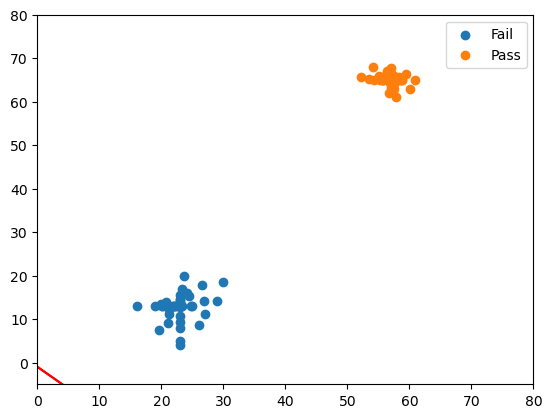

In [28]:
for key in grouped_data.groups.keys():
    data=grouped_data.get_group(key)
    x=data['X1']
    y=data['X2']
    plt.scatter(x,y,label = key)
    plt.xlim(0,80)
    plt.ylim(-5,80)
    plt.legend()
    
    slope = -1*nk[1]/nk[2]
    intercept = -1*nk[0]/nk[2]
    X = np.arange(80)
    Y=slope*X+intercept
    plt.plot(X,Y,c ='red')
plt.show()

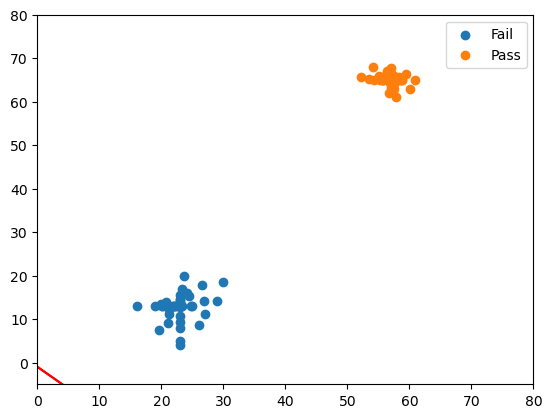

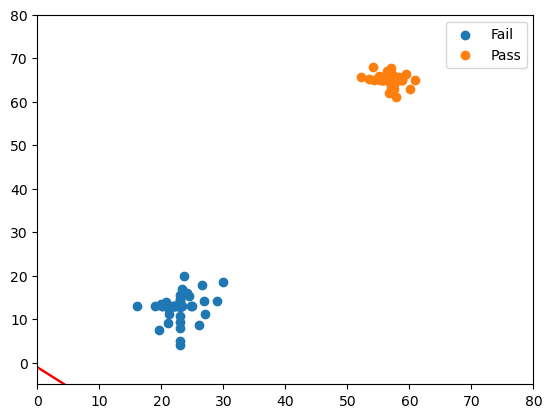

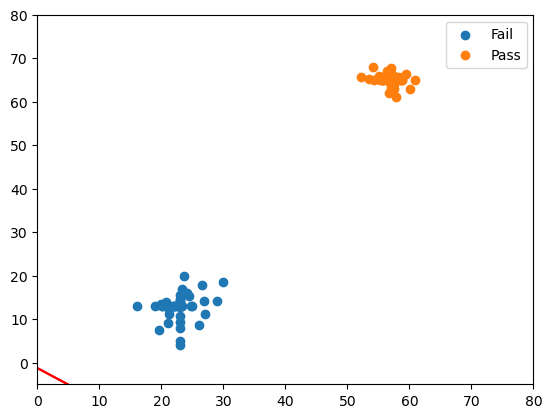

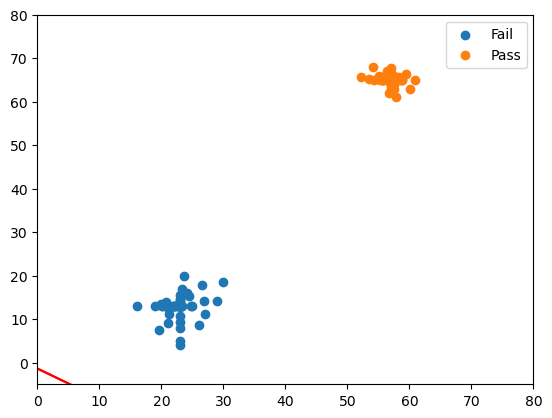

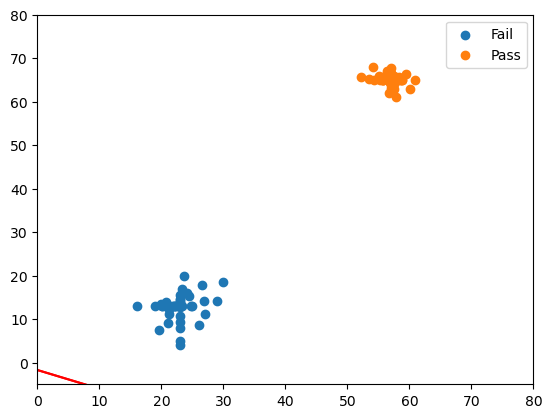

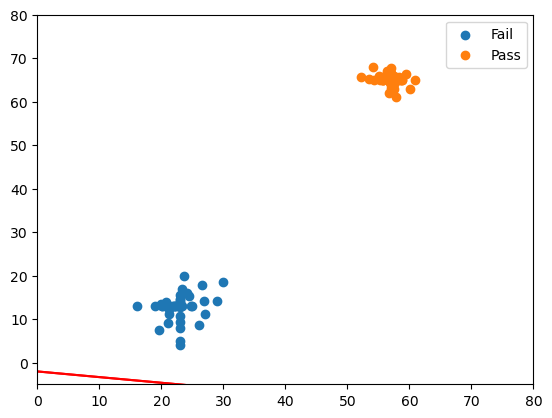

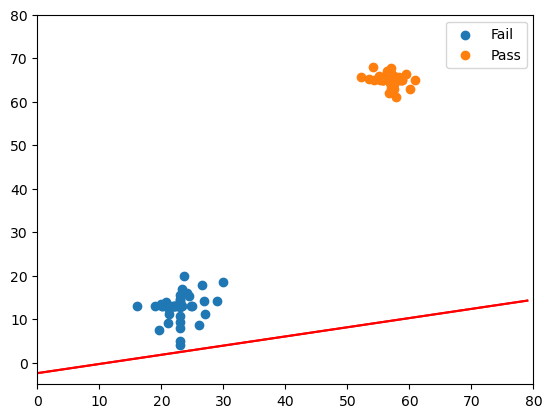

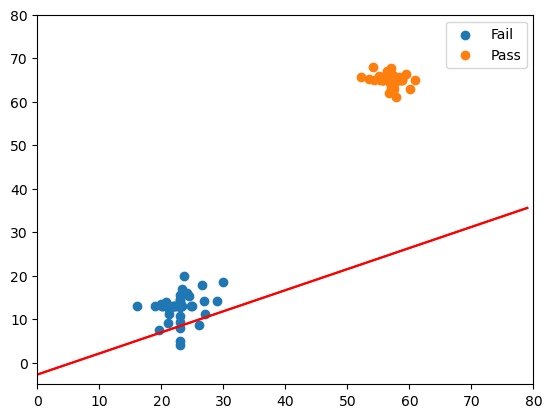

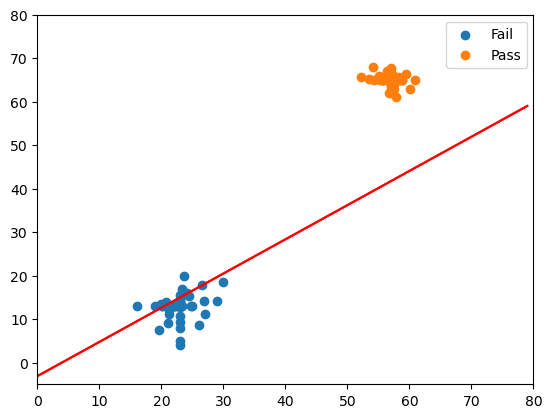

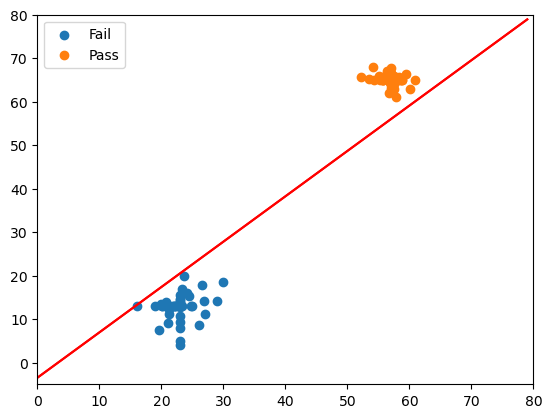

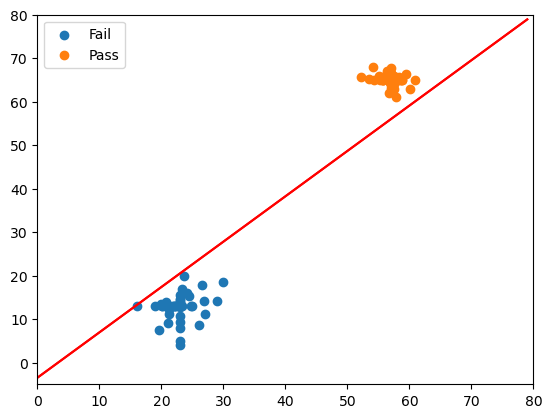

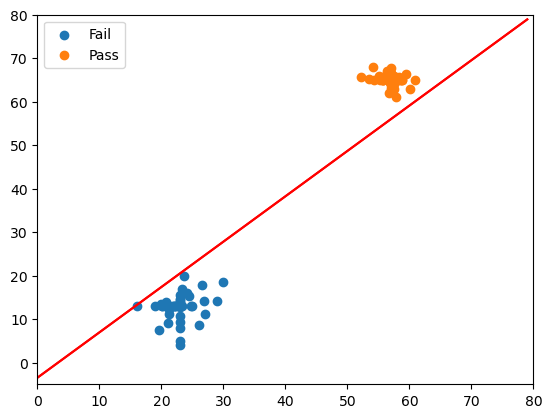

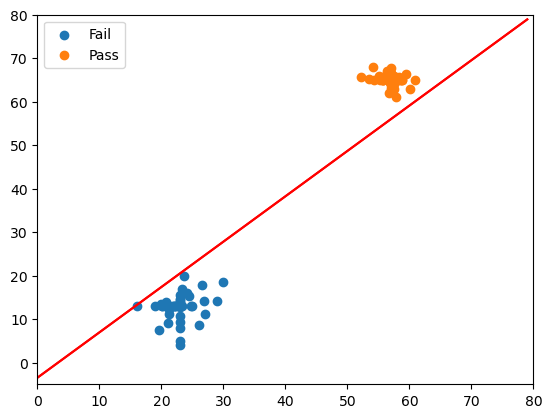

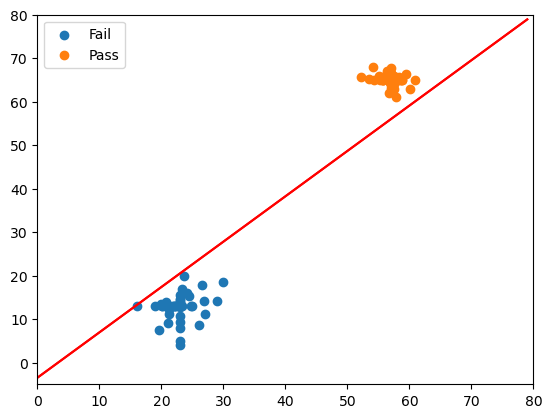

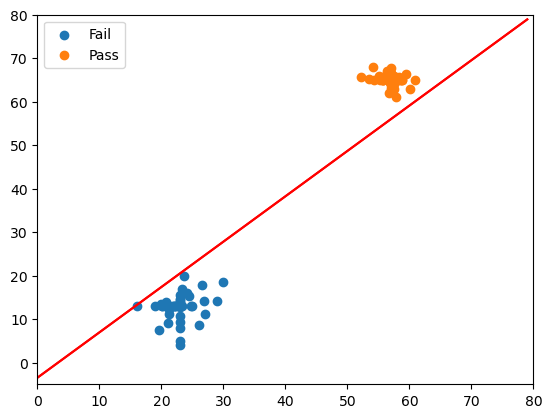

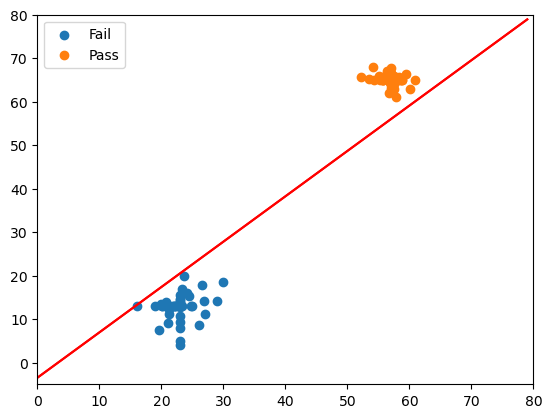

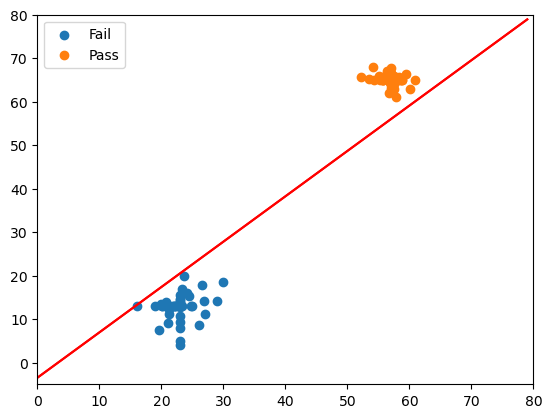

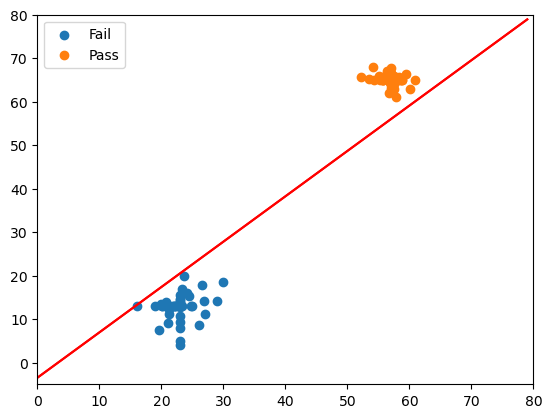

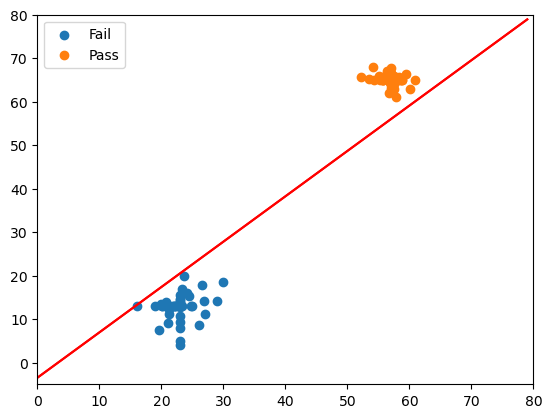

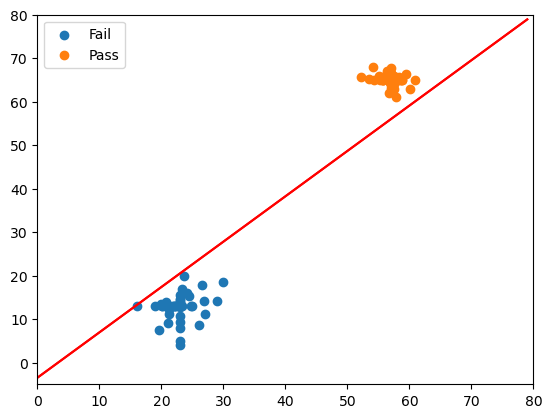

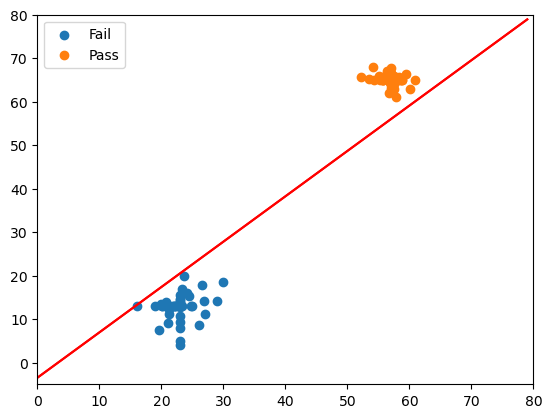

In [29]:
#Iterating until it keeps finding mistakes or max iterations are over
while updateCounter and iteration<maxIteration:
    updateCounter=False
    for i in range(len(train_data1)):
        nkprev=nk
        
        #Calculating a prediction value
        pred=np.array(train_data1.iloc[i,0:3]).dot(nk)
        if(train_data1.Result[i]=="Pass" and pred<0):
            nk=nkprev+clearn*((np.array(train_data1.iloc[i,0:3])).T)
            updateCounter=True
        elif(train_data1.Result[i]=="Fail" and pred>0):
            nk=nkprev-clearn*((np.array(train_data1.iloc[i,0:3])).T)
            updateCounter=True
        if(i%15==0 and iteration<=2000):
            grouped_data = train_data1.groupby(by='Result')
            for key in grouped_data.groups.keys():
                data = grouped_data.get_group(key)
                x =data ['X1']
                y =data ['X2']
                plt.scatter(x,y,label = key)
                plt.xlim(0,80)
                plt.ylim(-5,80)
                plt.legend()
                
                slope = -1*nk[1]/nk[2]
                intercept = -1*nk[0]/nk[2]
                X = np.arange(80)
                Y=slope*X+intercept
                plt.plot(X,Y,c ='red')
            plt.show()
        iteration=iteration+1

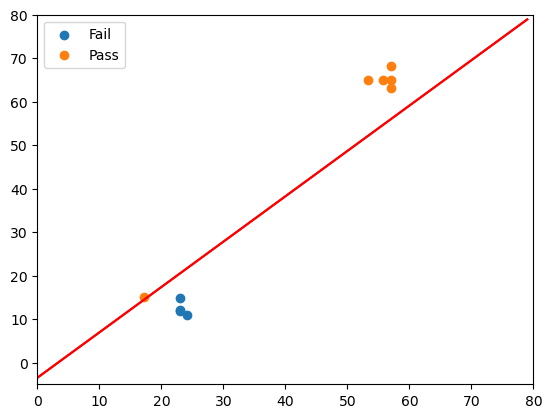

In [30]:
#Using obtained weights on test_data to predict values
test_data.columns
test_data1=pd.DataFrame({'X0': np.repeat(1, len(test_data))})
test_data1[['Engine','X1','X2']]=test_data[['Unnamed: 0','X1','X2']]
test_data1.sort_index(axis=1,inplace=True)
test_result=np.array(test_data1.iloc[:,1:4]).dot(nk)
test_data1['Test_Result']=test_result
test_data1['Predicted_Result']=np.where(test_data1['Test_Result']>0,"Pass","Fail")
grouped_data = test_data1.groupby(by='Predicted_Result')
for key in grouped_data.groups.keys():
    data = grouped_data.get_group(key)
    x =data ['X1']
    y =data ['X2']
    plt.scatter(x,y,label = key)
    plt.xlim(0,80)
    plt.ylim(-5,80)
    plt.legend()
    
    slope = -1*nk[1]/nk[2]
    intercept = -1*nk[0]/nk[2]
    X = np.arange(80)
    Y=slope*X+intercept
    plt.plot(X,Y,c ='red')
plt.show()